# CO416 - Machine Learning for Imaging

# Tutorial 2 - Scikit Learn & Image Classification


## Regularisation 

Machine Learning models may overfit to your training data (as discussed in Lecture 2 from slide 35). To avoid overfitting we add to our loss function a regularisation term controlled by a weighting $\lambda$. 

In the lectures you learned about two elementary regularisers, the L1 and L2 regularisation also known as Lasso and Ridge penalty, respectively.



In [1]:
import numpy as np
import struct 
import gzip
import pandas as pd 
import sklearn
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.pipeline# adjust settings to plot nice figures inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [2]:
# data directory
data_dir = '/vol/lab/course/416/data/mnist'
import torchvision.datasets as dset

# train data
train_set = dset.MNIST(root=data_dir, train=True, download=False)
train_x_mnist = np.array(train_set.train_data)
train_y_mnist = np.array(train_set.train_labels)

# test data
test_set = dset.MNIST(root=data_dir, train=False, download=False)
test_x_mnist = np.array(test_set.test_data)
test_y_mnist = np.array(test_set.test_labels)

In [3]:
############################################################################
# Extract sample digits 
############################################################################

def sample_data_digits(data, labels, labels_to_select):
    # convert input 3d arrays to 2d arrays
    
    nsamples, nx, ny = data.shape
    
    data_vec = np.reshape(data,(nsamples,nx*ny))
   
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_1=False, digit_2=True
    selected_labels = selected_labels==labels_to_select[1]
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]
     
    return selected_data, selected_labels




In [4]:
from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier
def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    X_Train_embedded = TSNE(n_components=2).fit_transform(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, Y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
    plt.show()


## Using Regularisers 

We will first use a toy example to better understand the concept of regularisation. The dataset to be used here is the *'make moons'* one which can be directly used from sklearn

**TASK**
- Train a SGD classifier with `loss='log'` to implement a logistic regression. 
- Use all regularisations and evaluate the performance of your model.
- Does your model overfit less or more after reguralization ? 

As you saw regularization does not affect the performance when the feature space is small. In order then to augment our feature space we make polynomial combinations of the existing features.

- Using sklearns sklearn.preprocessing.PolynomialFeatures with different order polynomials we can create polynomial combinations of our features. 


Regularisation: none , Accuracy on train data:  0.82
Regularisation: none , Accuracy on test data:  0.835
Regularisation: l2 , Accuracy on train data:  0.85
Regularisation: l2 , Accuracy on test data:  0.84
Regularisation: l1 , Accuracy on train data:  0.86625
Regularisation: l1 , Accuracy on test data:  0.88
Regularisation: elasticnet , Accuracy on train data:  0.8325
Regularisation: elasticnet , Accuracy on test data:  0.86
----------------------------------------------------------------
----- Polynomial degree 1 -------------------------------
Regularisation: none , Accuracy on train data:  0.86875
Regularisation: none , Accuracy on test data:  0.86


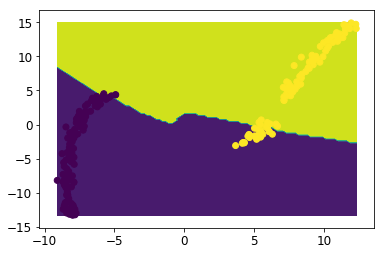

Regularisation: l2 , Accuracy on train data:  0.8725
Regularisation: l2 , Accuracy on test data:  0.87


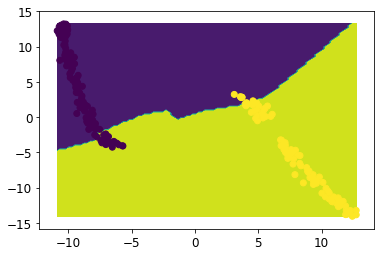

Regularisation: l1 , Accuracy on train data:  0.87875
Regularisation: l1 , Accuracy on test data:  0.89


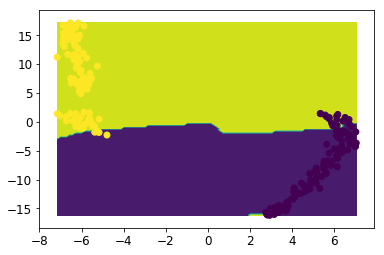

Regularisation: elasticnet , Accuracy on train data:  0.8775
Regularisation: elasticnet , Accuracy on test data:  0.865


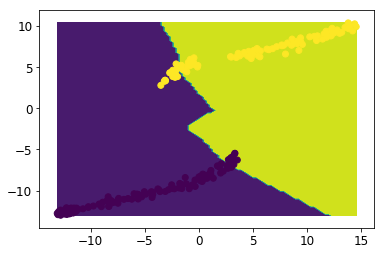

----- Polynomial degree 2 -------------------------------
Regularisation: none , Accuracy on train data:  0.85625
Regularisation: none , Accuracy on test data:  0.875


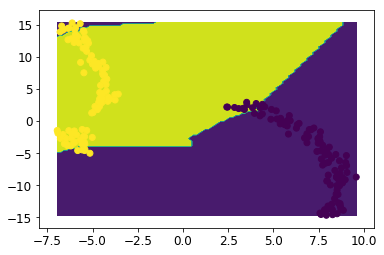

Regularisation: l2 , Accuracy on train data:  0.84875
Regularisation: l2 , Accuracy on test data:  0.83


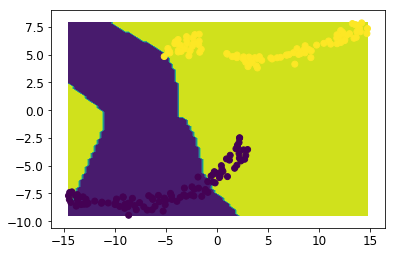

Regularisation: l1 , Accuracy on train data:  0.87125
Regularisation: l1 , Accuracy on test data:  0.86


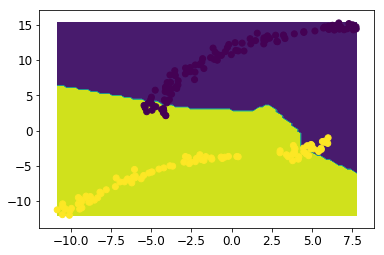

Regularisation: elasticnet , Accuracy on train data:  0.835
Regularisation: elasticnet , Accuracy on test data:  0.81


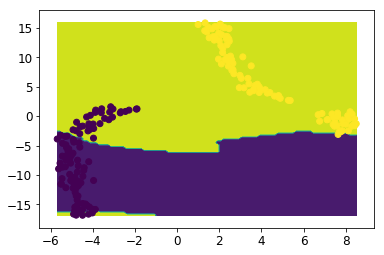

----- Polynomial degree 3 -------------------------------
Regularisation: none , Accuracy on train data:  0.99875
Regularisation: none , Accuracy on test data:  1.0


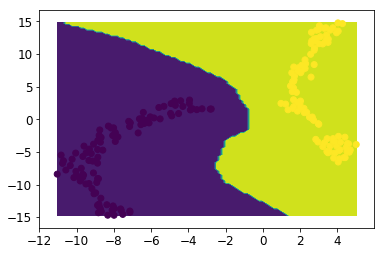

Regularisation: l2 , Accuracy on train data:  0.9925
Regularisation: l2 , Accuracy on test data:  0.99


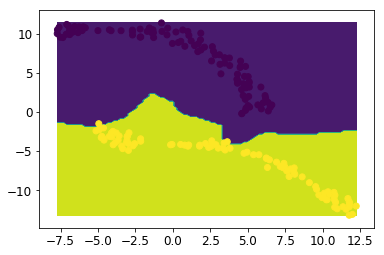

Regularisation: l1 , Accuracy on train data:  0.99625
Regularisation: l1 , Accuracy on test data:  0.995


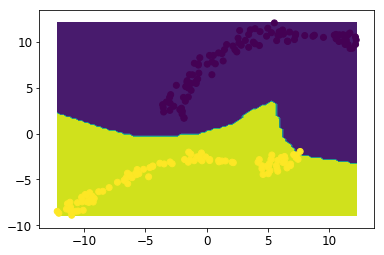

Regularisation: elasticnet , Accuracy on train data:  0.9975
Regularisation: elasticnet , Accuracy on test data:  1.0


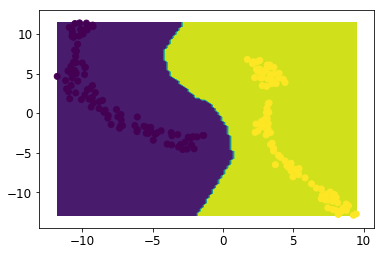

----- Polynomial degree 4 -------------------------------
Regularisation: none , Accuracy on train data:  1.0
Regularisation: none , Accuracy on test data:  1.0


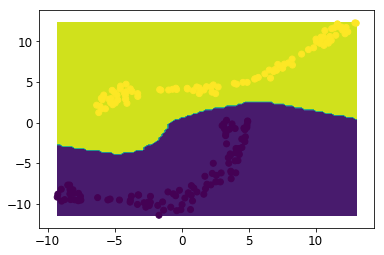

Regularisation: l2 , Accuracy on train data:  0.9975
Regularisation: l2 , Accuracy on test data:  1.0


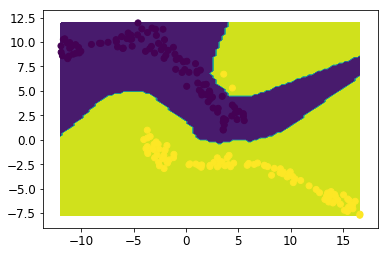

Regularisation: l1 , Accuracy on train data:  1.0
Regularisation: l1 , Accuracy on test data:  1.0


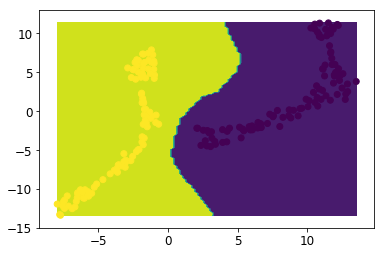

Regularisation: elasticnet , Accuracy on train data:  0.99875
Regularisation: elasticnet , Accuracy on test data:  1.0


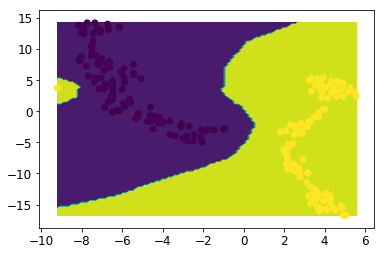

----- Polynomial degree 5 -------------------------------
Regularisation: none , Accuracy on train data:  1.0
Regularisation: none , Accuracy on test data:  1.0


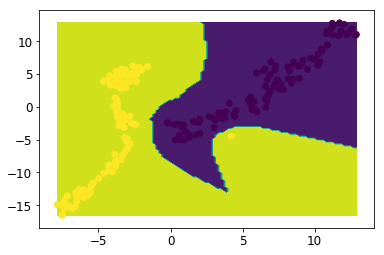

Regularisation: l2 , Accuracy on train data:  1.0
Regularisation: l2 , Accuracy on test data:  1.0


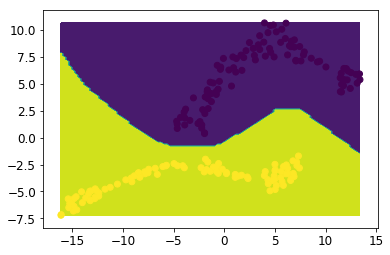

Regularisation: l1 , Accuracy on train data:  1.0
Regularisation: l1 , Accuracy on test data:  1.0


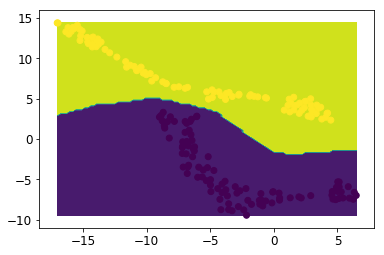

Regularisation: elasticnet , Accuracy on train data:  1.0
Regularisation: elasticnet , Accuracy on test data:  1.0


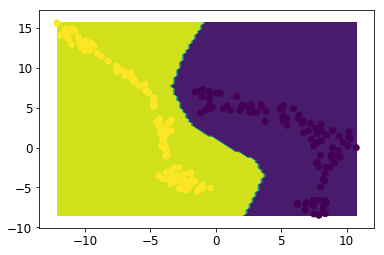

----- Polynomial degree 6 -------------------------------
Regularisation: none , Accuracy on train data:  1.0
Regularisation: none , Accuracy on test data:  1.0


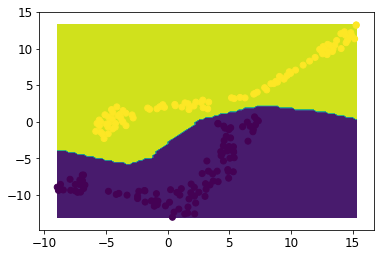

Regularisation: l2 , Accuracy on train data:  1.0
Regularisation: l2 , Accuracy on test data:  1.0


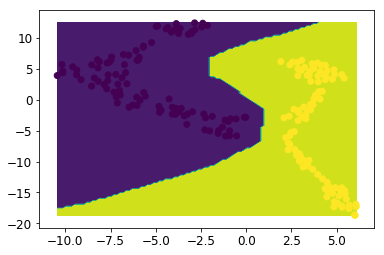

Regularisation: l1 , Accuracy on train data:  1.0
Regularisation: l1 , Accuracy on test data:  1.0


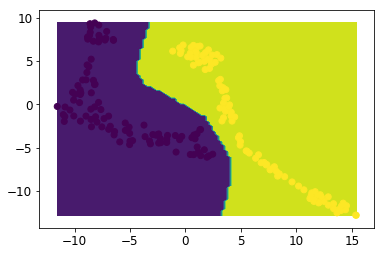

Regularisation: elasticnet , Accuracy on train data:  1.0
Regularisation: elasticnet , Accuracy on test data:  1.0


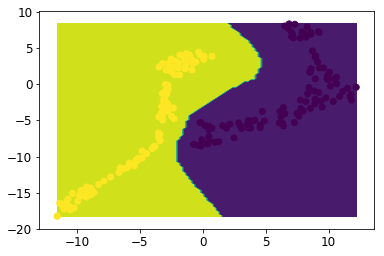

----- Polynomial degree 7 -------------------------------
Regularisation: none , Accuracy on train data:  0.995
Regularisation: none , Accuracy on test data:  1.0


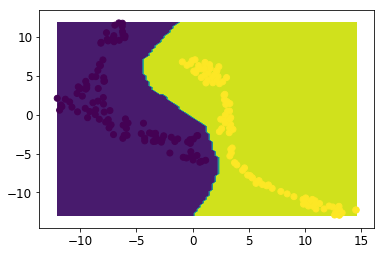

Regularisation: l2 , Accuracy on train data:  1.0
Regularisation: l2 , Accuracy on test data:  1.0


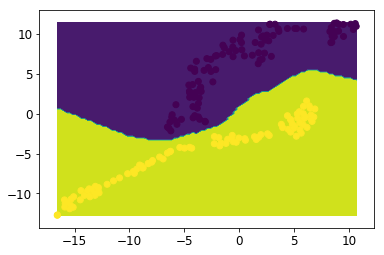

Regularisation: l1 , Accuracy on train data:  1.0
Regularisation: l1 , Accuracy on test data:  1.0


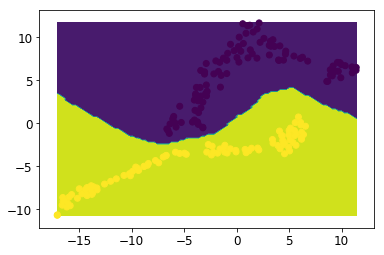

Regularisation: elasticnet , Accuracy on train data:  1.0
Regularisation: elasticnet , Accuracy on test data:  1.0


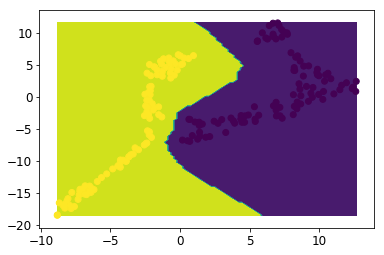

----- Polynomial degree 8 -------------------------------
Regularisation: none , Accuracy on train data:  0.98875
Regularisation: none , Accuracy on test data:  0.98


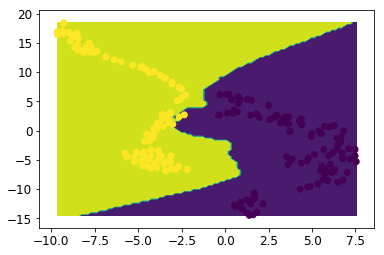

Regularisation: l2 , Accuracy on train data:  1.0
Regularisation: l2 , Accuracy on test data:  1.0


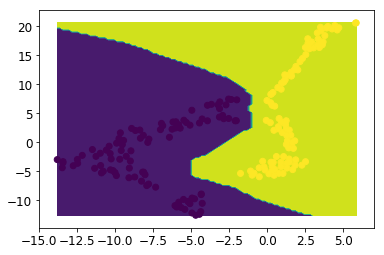

Regularisation: l1 , Accuracy on train data:  0.95375
Regularisation: l1 , Accuracy on test data:  0.945


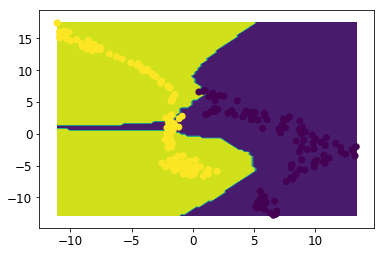

Regularisation: elasticnet , Accuracy on train data:  0.99375
Regularisation: elasticnet , Accuracy on test data:  1.0


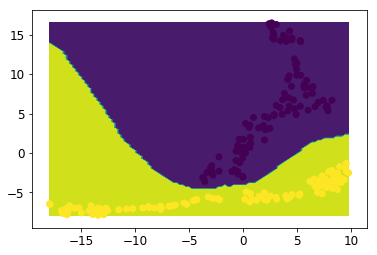

----- Polynomial degree 9 -------------------------------
Regularisation: none , Accuracy on train data:  0.89125
Regularisation: none , Accuracy on test data:  0.9


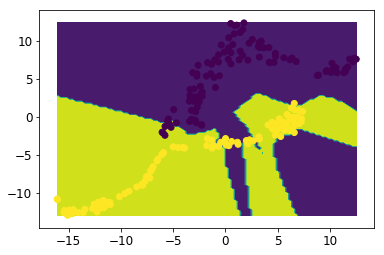

Regularisation: l2 , Accuracy on train data:  0.99125
Regularisation: l2 , Accuracy on test data:  0.985


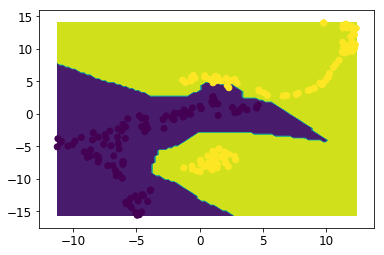

Regularisation: l1 , Accuracy on train data:  1.0
Regularisation: l1 , Accuracy on test data:  1.0


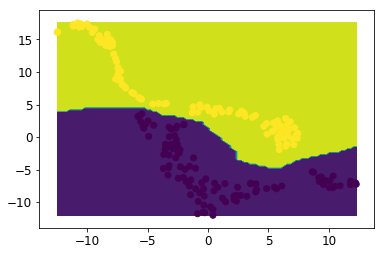

Regularisation: elasticnet , Accuracy on train data:  0.9925
Regularisation: elasticnet , Accuracy on test data:  0.995


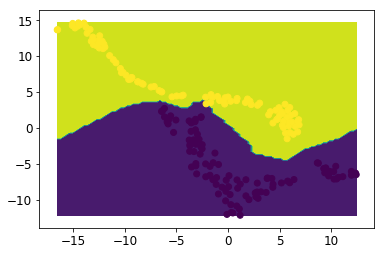

----- Polynomial degree 10 -------------------------------
Regularisation: none , Accuracy on train data:  0.96
Regularisation: none , Accuracy on test data:  0.945


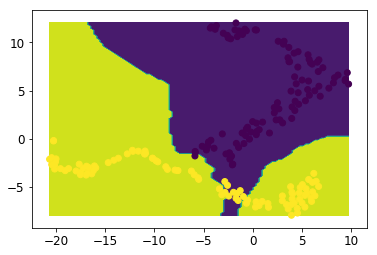

Regularisation: l2 , Accuracy on train data:  0.99625
Regularisation: l2 , Accuracy on test data:  1.0


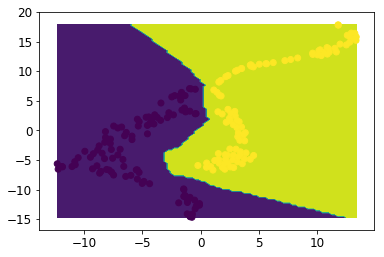

Regularisation: l1 , Accuracy on train data:  0.82875
Regularisation: l1 , Accuracy on test data:  0.81


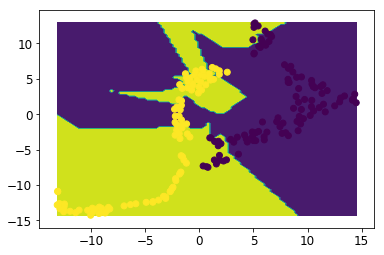

Regularisation: elasticnet , Accuracy on train data:  0.95125
Regularisation: elasticnet , Accuracy on test data:  0.94


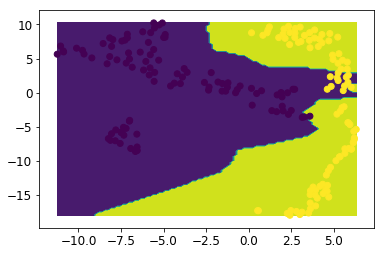

In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

np.random.seed(42)

X, Y = make_moons(1000, noise=0.1)
#####################################################################
# Perform a train test split , use 20% of your dataset for testing.
#####################################################################
# ADD YOUR CODE HERE
def sgd_various_regs(X, Y, regularisation='l2', poly=False):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    model = SGDClassifier(loss='log', penalty=regularisation)
    model.fit(X_train, y_train)

    print("Regularisation:", regularisation, ", Accuracy on train data: ", model.score(X_train, y_train))
    print("Regularisation:", regularisation, ", Accuracy on test data: ", model.score(X_test, y_test))
    #####################################################################
    # Plot the decision boundary (for polynomial features)
    #####################################################################

    if poly==True:
        plot_decision_boundary(model, X_test, y_test)
        
regs = ['none', 'l2', 'l1', 'elasticnet']
for reg in regs:
    sgd_various_regs(X, Y, regularisation=reg)
print('----------------------------------------------------------------')
#####################################################################
# Perform a polynomial feature transform  use degree 10 to start and then explore different polynomial degrees
#####################################################################

# ADD YOUR CODE HERE
for i in np.arange(1, 11):
    poly = sklearn.preprocessing.PolynomialFeatures(degree=i)
    X_transform = poly.fit_transform(X)
    print("----- Polynomial degree", i, "-------------------------------")
    regs = ['none', 'l2', 'l1', 'elasticnet']
    for reg in regs:
        sgd_various_regs(X_transform, Y, regularisation=reg, poly=True)

## Diving Deeper 

Now we will move back to the MNIST dataset. Extract from the dataset digits 0 and 8.

**TASK**

Below you will find the model solution for the logistic regression classifier as defined in Tutorial 1. 
- Modify this class to take one more argument that is the penalty and apply the penalty function to the loss. 
- Implement L1 and L2 regularisations not the elastic net.
- Use your model and comment on how regularisation alters the performance 

See the lecture notes at Lecture 2 slide 39-41 

In [27]:
###########################################################################
# Extract zeros and eights digits from both training and testing data 
############################################################################
labels_to_select = [0,8]
# ADD YOUR CODE HERE
sel_train_x, sel_train_y = sample_data_digits(train_x_mnist, train_y_mnist, labels_to_select)
sel_test_x, sel_test_y = sample_data_digits(test_x_mnist, test_y_mnist, labels_to_select)

In [31]:
from sklearn.base import BaseEstimator, ClassifierMixin
class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.05, num_iter=1000, add_bias=True, verbose=True,lambda_val=0.5,penalty='L1'):
        self.lr = lr
        self.lambda_val = lambda_val
        self.verbose = verbose
        self.num_iter = num_iter
        self.add_bias = add_bias
        self.penalty = penalty
        self.theta = None
        
    
    def __add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    
    
    def regularise(self):
        if self.penalty=='L1':
            reg = np.sum(np.abs(self.theta))
        elif self.penalty=='L2':
            reg = np.sqrt(np.sum(self.theta ** 2))
        else:
            reg = 0
        return reg
    
    
    ############################################################################
    #  compute the loss + ADD YOUR PENALTY HERE
    ############################################################################
    def __loss(self, h, y):
        ''' computes loss values '''
        y = np.array(y,dtype=float)
        
        reg = self.regularise()
            
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)+ reg ).mean()

    
    def fit(self, X, y):
        ''' 
        Optimise our model using gradient descent
        Arguments:
            X input features
            y labels from training data
            
        '''
        if self.add_bias:
            X = self.__add_bias(X)
        
        
        ############################################################################
        #initialise weights randomly with normal distribution N(0,1)
        ############################################################################
        self.theta = np.random.normal(0.0,0.01,X.shape[1])
        
        for i in range(self.num_iter):
            ############################################################################
            #  forward propagation
            ############################################################################
            z = X.dot(self.theta)
            h = 1.0 / (1.0 + np.exp(-z))
            ############################################################################
            #  backward propagation + ADD YOUR PENALTY HERE
            ############################################################################
            # update parameters
            
            # ADD YOUR CODE HERE
            reg=self.regularise()
            self.theta -= self.lr * ( np.dot(X.T, (h - y))+reg) / y.size


            ############################################################################
            # print loss
            ############################################################################
            if(self.verbose == True and i % 50 == 0):
                h = 1.0 / (1.0 + np.exp(-X.dot(self.theta)))
                print('loss: {} \t'.format(self.__loss(h, y)))
    
    def predict_probs(self,X):
        ''' returns output probabilities
        '''
        ############################################################################
        # forward propagation
        ############################################################################
        if self.add_bias:
            X = self.__add_bias(X)
        z = X.dot(self.theta)
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X, threshold=0.5):
        ''' returns output classes
        '''
        return self.predict_probs(X) >= threshold
    
    def score(self, X,Y):
        '''
            Returns accuracy of model
        '''
        preds = self.predict(X)
        accuracy = (preds == Y).mean()
        return accuracy
    

### Deploying Regressor with regularisation

In order to see the full effect of the regularisation we look into a scenario where the classifier clearly overfits. We will only use a small portion of the MNIST dataset, with 75 data points to begin with and then experiment with other values.

**TASK**

- Train your logistic regressor with 75 training datapoints, learning rate=1e-3 and 10,000 iteration and all possible penalties
- Evaluate the performance of your model, using model.score(X,Y)
- Use the weight plotting function from Tutorial 1 and comment on how reguralization affects them (Hint see slide 41 from lecture 2) 

loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss

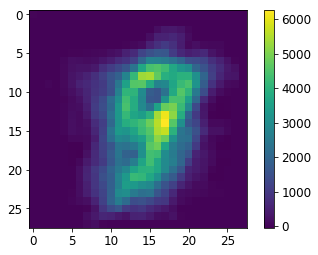

loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss

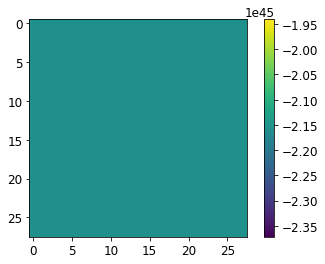

loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss: nan 	
loss

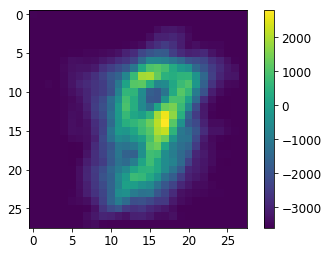

In [41]:
#########################################################################
# Q: train our model using raw pixels , train for all penalties and for various lambda values
#########################################################################
for pen in ['None','L1','L2']:
    for lam_val in [0.7]:
      
        #########################################################################
        # Q: Evaluate the trained model - compute train and test accuracies
        #########################################################################
        
        # ADD YOUR CODE HERE
        model = LogisticRegression(lr=0.001, num_iter=10000, penalty=pen)
        
        # Random 75 data points for training, 75 for testing
        nsamples_train, nx, ny = train_x_mnist.shape
        train_data_vec = np.reshape(train_x_mnist,(nsamples_train,nx*ny))

        nsamples_test, nx, ny = test_x_mnist.shape
        test_data_vec = np.reshape(test_x_mnist,(nsamples_test,nx*ny))
        
        shuffle_index_train = np.random.permutation(75)
        shuffle_index_test = np.random.permutation(75)

        train_x, train_y = train_data_vec[shuffle_index_train], train_y_mnist[shuffle_index_train]
        test_x, test_y = test_data_vec[shuffle_index_test], test_y_mnist[shuffle_index_test]

        # Fit data
        model.fit(train_x, train_y)
        
        # Check accuracy
        train_acc = model.score(train_x, train_y)
        test_acc = model.score(test_x, test_y)
        print('Accuracy on training set:', train_acc)
        print('Accuracy on testing set:', test_acc)
        
        #########################################################################
        # Q: draw trained model params (weights) as an image of size (28x28)
        #########################################################################
        plt.imshow(model.theta[:-1].reshape(28,28))
        plt.colorbar()
        plt.show()

### Regularisation using sklearn
Now that we know how to implement logistic regression with L1 and L2 regularisation on numpy lets use an industry standard version - sklearn 

**TASK**

Use sklearns SGD classifier with the `loss='log'` to perform logistic regression, you can change the penalty function by changing the `penalty` argument 
- Use all 10 classes
- Do you get different performance ? 
- Why is there a difference ? 

In [43]:
############################################################################
############################################################################
# reshape to (N,728) this is number of samples N and the nuber of features 28x28=728
x_train=np.reshape(train_x_mnist,(train_x_mnist.shape[0],train_x_mnist.shape[1]*train_x_mnist.shape[2]))
x_test=np.reshape(test_x_mnist,(test_x_mnist.shape[0],test_x_mnist.shape[1]*test_x_mnist.shape[2]))

In [44]:
############################################################################
############################################################################
# No Regularisation 
############################################################################

# ADD YOUR CODE HERE

############################################################################
# L1 Reguralization 
############################################################################

# ADD YOUR CODE HERE

############################################################################
# L2 Reguralization 
############################################################################

# ADD YOUR CODE HERE

for pen in ['none', 'l1', 'l2']:
    model = SGDClassifier(loss='log', penalty=pen)
    model.fit(x_train, train_y_mnist)

    print("Regularisation:", pen, ", Accuracy on train data: ", model.score(x_train, train_y_mnist))
    print("Regularisation:", pen, ", Accuracy on test data: ", model.score(x_test, test_y_mnist))
    


Regularisation: none , Accuracy on train data:  0.9043333333333333
Regularisation: none , Accuracy on test data:  0.8987
Regularisation: l1 , Accuracy on train data:  0.9043833333333333
Regularisation: l1 , Accuracy on test data:  0.9018
Regularisation: l2 , Accuracy on train data:  0.8770666666666667
Regularisation: l2 , Accuracy on test data:  0.8715


## Validation 

As you have seen so far the performance of your models heavily depend on the values of the hyperparameters you choose. As we do not know a priori how these would affect the test accuracy we reserve a portion of our training data to use as a validation set. Using the test set is forbidden as this constitutes data-snooping and it makes our experiments null, and we would find unrealistic performance in the real world. 

**TASK**
- Using sklearns SGD classifier with log loss alter the validation portion.
- Build your own validation scheme. 
   - Use the train-val-test split function and also determine a set of possible values for your hyperparameters (use different learning rates and different $\lambda$ values for the regulariser (in sklearn the name the parameter to be $\alpha$).
   - Iterate though your possible values and evaluate the performance of your algorithm with the validation set 
   - Determine the best hyperparameters based on the performance on the validation set
   - Execute a complete training and evaluate the models performance on the testing set
   

In [48]:
from sklearn.model_selection import train_test_split
############################################################################
# Split into train and val test_size=0.10, random_state=42
############################################################################
# ADD YOUR CODE HERE
X_train, X_val, y_train, y_val = train_test_split(x_train, train_y_mnist, test_size=0.1, random_state=42)

#Initialize best values
best = np.zeros(X_train.shape[1])
############################################################################
# Iterate over selected values
############################################################################
val_accuracies = []
# Index 0: max accuracy, Index 1: lr, Index 2: alpha
max_accuracy = None
for lr in [1e-2,1e-3,1e-6]:
    for al in [0.5,0.1,0.01]:
        # ADD YOUR CODE HERE
        model = SGDClassifier(loss='log', alpha=al)
        model.fit(X_train, y_train)
        
        val_acc = model.score(X_val, y_val)
        val_accuracies.append(val_acc)
        if val_acc > val_accuracies.max():
            max_accuracy = [val_acc, lr, al]
            best = model.get_params()
            
        print('Accuracy on val set with lr = {}, alpha = {}: {}'.format(lr, al, val_acc))
        
 # print best hyperparameters and accuracy   
print(best)
# Build new model and set params
model_final = SGDClassifier(loss='log', alpha=[max_accuracy[2]])
model_final.set_params(best)


TypeError: __init__() got an unexpected keyword argument 'lr'

### Bonus 
- Implement an Elastic Net and then compare it with sklearns implementation. 
- Redo all the above tests with this.